In [11]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
#Load in files
with open("optimization_inhib_ratio.pkl", "rb") as fid:
    optimization = pickle.load(fid)
    
with open("objective_inhib_ratio.pkl", "rb") as fid:
    objective = pickle.load(fid)
    
with open("simulation_inhib_ratio.pkl", "rb") as fid:
    simulation = pickle.load(fid)

In [13]:
#Print returned optimization output
optimization

,population,pop_ratio,mut_rate,cov_rate,Fitness,Convergence
0,43.0,0.284936,0.000000,0.075357,-69.920450,0.0
1,48.0,0.676286,0.512605,1.000000,-69.923981,3.0
2,20.0,0.212464,0.327870,0.262827,-69.941547,4.0
3,40.0,0.445437,0.917281,0.265282,-69.989871,7.5


In [14]:
#Create DF for objective data, adding a boolean column for successes
objectiveDF = pd.DataFrame.from_records(objective, columns=['Mutation Rate','Crossover Rate','Fitness','Convergence'])
objectiveDF['Convergence'] = objectiveDF['Convergence'].astype(int)
objectiveDF['success'] = objectiveDF['Fitness'] < -69.98987
objectiveDF

,population,pop_ratio,mut_rate,cov_rate,Fitness,Convergence,success
0,37.0,0.232339,0.880949,0.773979,-69.989871,8,True
1,22.0,0.334733,0.518408,0.696683,-69.989871,23,True
2,48.0,0.579348,0.894421,0.933615,-69.925317,11,False
3,37.0,0.715343,0.667830,0.910706,-69.893223,0,False
4,32.0,0.755117,0.508329,0.018876,-69.893223,0,False
...,...,...,...,...,...,...,...
395,13.0,0.925366,0.222301,0.821630,-69.893223,0,False
396,36.0,0.461842,0.235122,0.350482,-69.941547,17,False
397,24.0,0.566625,0.077513,0.291687,-69.893223,1,False
398,43.0,0.284936,0.000000,0.075357,-69.920450,0,False


In [15]:
# Create dataframes based on success
successes = objectiveDF[objectiveDF['Fitness'] < -69.98987]
failures = objectiveDF[objectiveDF['Fitness'] > -69.98987]

In [16]:
# Calculate averages for successful simulations
print("Average mutation rate for success:",successes['mut_rate'].mean())
print("Average crossover rate for success:",successes['cov_rate'].mean())
print("Average convergence rate for success:",successes['Convergence'].mean())

Average mutation rate for success: 0.6640377338587485
Average crossover rate for success: 0.48264471342649634
Average convergence rate for success: 16.23


In [17]:
# Look at averages by convergence
successes.groupby('Convergence').mean()

,population,pop_ratio,mut_rate,cov_rate,Fitness,success
Convergence,,,,,,
7,42.333333,0.365250,0.875739,0.384564,-69.989871,1.0
8,42.000000,0.173758,0.929970,0.651138,-69.989871,1.0
9,33.666667,0.178174,0.770885,0.426361,-69.989871,1.0
10,30.333333,0.202144,0.777176,0.591839,-69.989871,1.0
11,37.357143,0.336943,0.785716,0.442685,-69.989871,1.0
12,35.777778,0.238018,0.717782,0.308188,-69.989871,1.0
13,39.400000,0.407903,0.612819,0.354130,-69.989871,1.0
14,30.333333,0.393352,0.634516,0.524140,-69.989871,1.0
15,28.750000,0.278197,0.539123,0.417043,-69.989871,1.0


[Text(0.5, 1.0, 'Convergence vs. Fitness for All Simulations')]

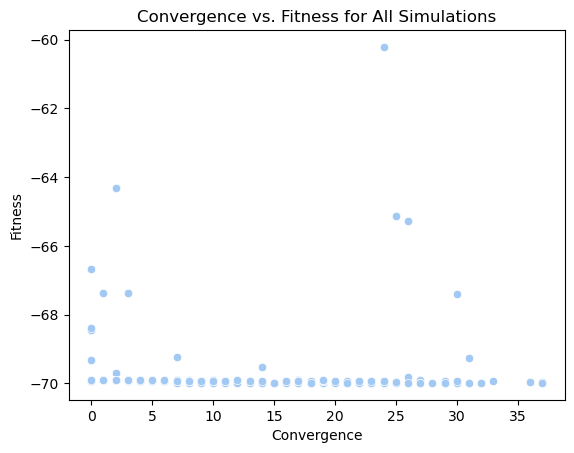

In [18]:
# Build a scatter plot of convergence vs. fitness
sns.scatterplot(x='Convergence', y='Fitness', data= objectiveDF).set(title='Convergence vs. Fitness for All Simulations')

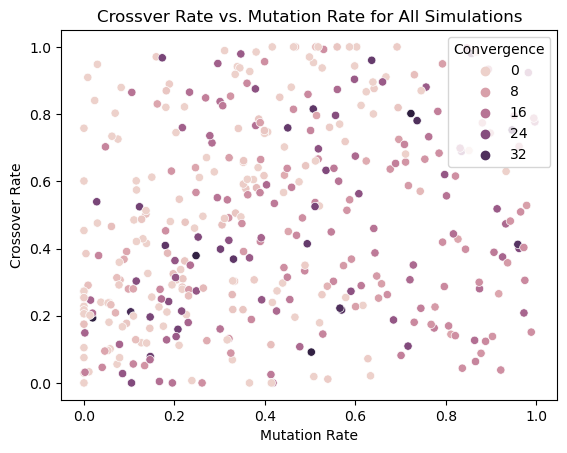

In [19]:
# Loot at convergence by mutation and crossover rate
sns.set_palette("pastel")
sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF,
                hue = 'Convergence').set(title='Crossver Rate vs. Mutation Rate for All Simulations')
plt.ylabel("Crossover Rate")
plt.xlabel("Mutation Rate")
plt.savefig('Convergence_inhib_ratio')

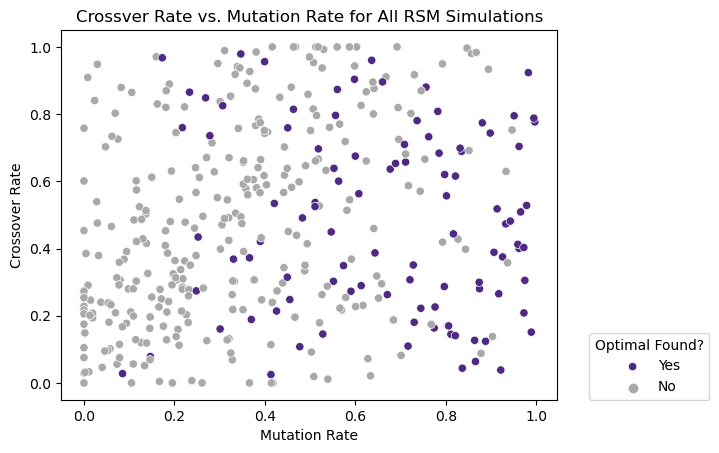

In [22]:
# Loot at success by mutation and crossover rate
colors = ["DarkGrey","#4E2A84"]

plot = objectiveDF
plot['Optimal'] = plot['success']

sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF,
                hue = 'Optimal', palette = sns.color_palette(colors)).set(title='Crossver Rate vs. Mutation Rate for All RSM Simulations',
                                                                         xlabel = 'Mutation Rate', ylabel = 'Crossover Rate')
plt.legend(loc='upper left', title = "Optimal Found?", labels=['Yes', 'No'], bbox_to_anchor=(1.05, 0.2))
plt.savefig('Success_inhib_ratio', bbox_inches='tight' )

## Build plots to explore successful simulations

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Successful Simulations')]

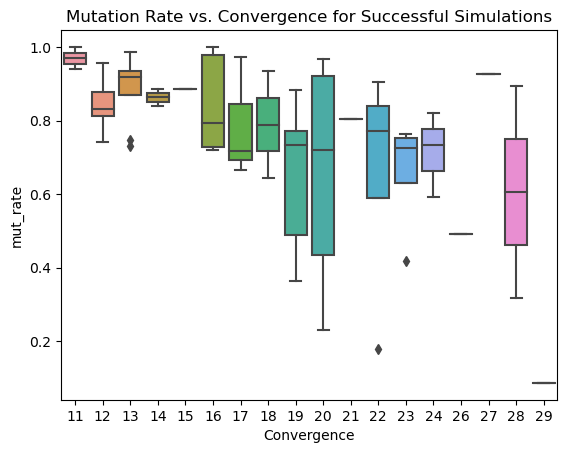

In [14]:
# Look at the distribution of mutation rate by convergence for successful simulations
sns.boxplot(x='Convergence', y='mut_rate', data= successes).set(title='Mutation Rate vs. Convergence for Successful Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Successful Simulations')]

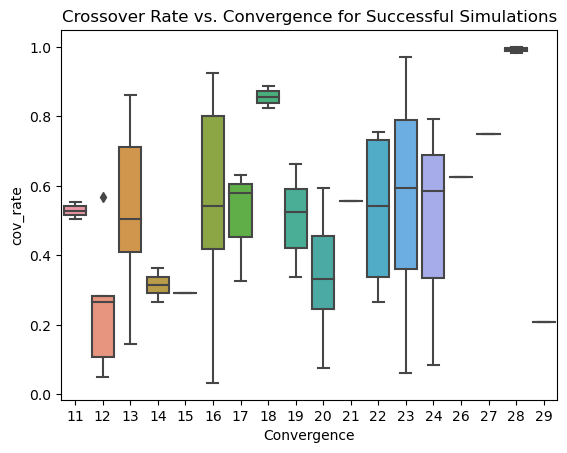

In [15]:
# Look at the distribution of crossover rate by convergence for successful simulations
sns.boxplot(x='Convergence', y='cov_rate', data= successes).set(title='Crossover Rate vs. Convergence for Successful Simulations')

In [16]:
# Group the data by convergence
groups_size = pd.DataFrame(successes.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Successful Simulations by Convergence')]

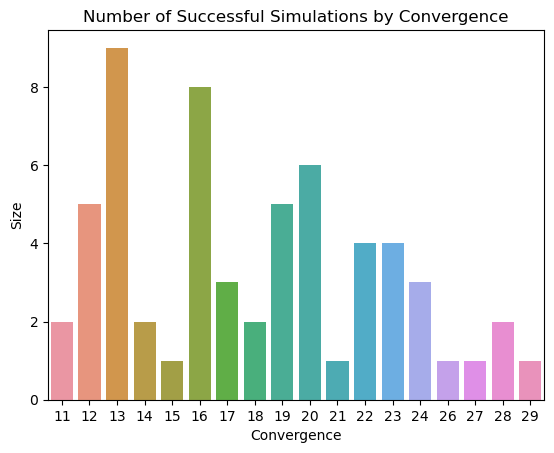

In [17]:
# Count the number of successful simulations by convergence
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Successful Simulations by Convergence')

## Build the same plots for failed simulations

[Text(0.5, 1.0, 'Convergence vs. Fitness for Failed Simulations')]

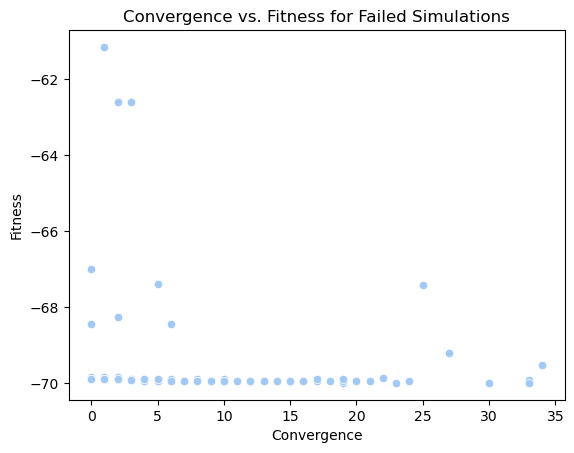

In [18]:
sns.scatterplot(x='Convergence', y='Fitness', data= failures).set(title='Convergence vs. Fitness for Failed Simulations')

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Failed Simulations')]

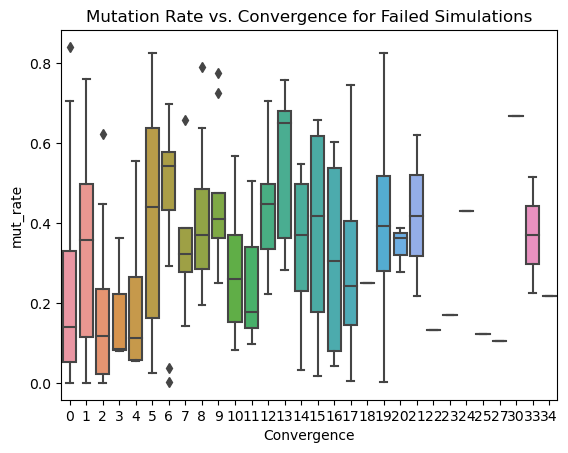

In [19]:
sns.boxplot(x='Convergence', y='mut_rate', data= failures).set(title='Mutation Rate vs. Convergence for Failed Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Failed Simulations')]

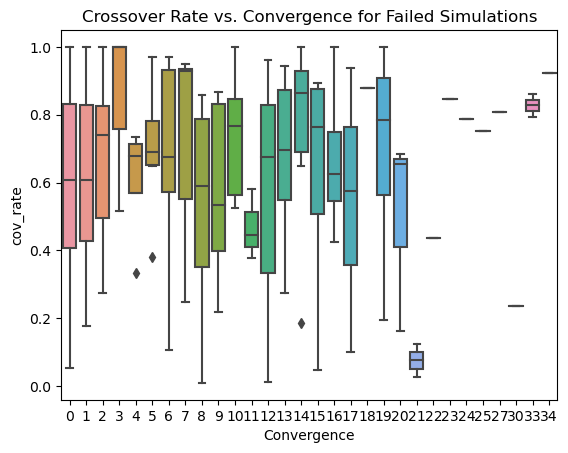

In [20]:
sns.boxplot(x='Convergence', y='cov_rate', data= failures).set(title='Crossover Rate vs. Convergence for Failed Simulations')

In [21]:
groups_size = pd.DataFrame(failures.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Failed Simulations by Convergence')]

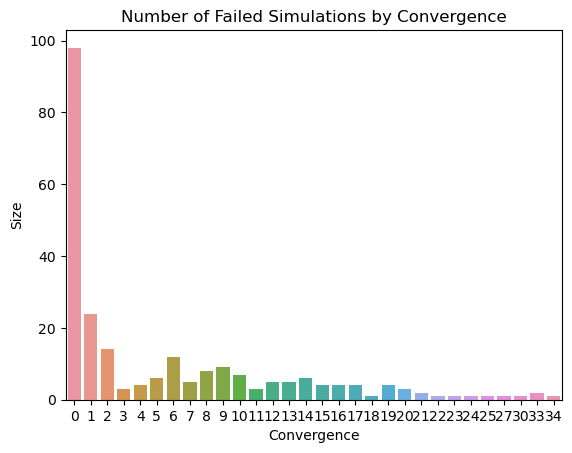

In [22]:
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Failed Simulations by Convergence')